<a href="https://colab.research.google.com/github/cesarpena2529/PitchDNA/blob/main/Upload_and_Merge_Pitcher_CSVs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 PitchDNA CSV Merger for Colab
Upload your yearly `pitcher_stats_YYYY.csv` files below and this notebook will combine them into a single dataset.

In [ ]:
from google.colab import files
import pandas as pd
import io

# Upload your CSVs (you can select multiple files)
uploaded = files.upload()

# Auto-detect and read all pitcher_stats_*.csv files
dfs = []
for name in uploaded.keys():
    if name.startswith("pitcher_stats_") and name.endswith(".csv"):
        print(f"✅ Loading {name}")
        df = pd.read_csv(io.BytesIO(uploaded[name]))
        if 'year' not in df.columns:
            # Extract year from file name if not in columns
            year = int(name.split("_")[2].split(".")[0])
            df['year'] = year
        dfs.append(df)

# Combine all loaded DataFrames
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df.drop_duplicates(inplace=True)
    print(f"\n✅ Combined shape: {combined_df.shape}")
    combined_df.to_csv("pitcher_stats_combined_2015_2025.csv", index=False)
    print("\n📁 Saved as: pitcher_stats_combined_2015_2025.csv")
else:
    print("⚠️ No valid CSV files were uploaded.")

⚠️ No valid CSV files were uploaded.


In [ ]:
from google.colab import files
files.download("pitcher_stats_combined_2015_2025.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the combined pitcher data
df = pd.read_csv("pitcher_stats_combined_2015_2025.csv")

# List of pitch types (based on column prefixes)
pitch_types = ['ff', 'sl', 'ch', 'cu', 'fc', 'si', 'fs', 'kn', 'sp']

# List of common suffixes for each pitch type
stat_suffixes = [
    'avg_speed', 'avg_spin', 'avg_break_x', 'avg_break_z', 'avg_break_z_induced',
    'avg_break', 'range_speed'
]

# Melt the wide data into long format
records = []
for _, row in df.iterrows():
    for pitch in pitch_types:
        stats = {}
        prefix = f"{pitch}_"
        stat_found = False
        for suffix in stat_suffixes:
            col = prefix + suffix
            if col in df.columns and pd.notnull(row[col]):
                stats[suffix] = row[col]
                stat_found = True
        usage_col = f"n_{pitch}_formatted"
        if usage_col in df.columns:
            stats['usage_pct'] = row[usage_col]
        if stat_found:
            stats.update({
                'name': row['last_name, first_name'],
                'player_id': row['player_id'],
                'year': row['year'],
                'pitch_hand': row.get('pitch_hand', None),
                'arm_angle': row.get('arm_angle', None),
                'pitch_type': pitch
            })
            records.append(stats)

# Convert to DataFrame
long_df = pd.DataFrame(records)

# Save to CSV
output_file = "pitcher_long_format.csv"
long_df.to_csv(output_file, index=False)
print(f"✅ Long-format dataset saved to: {output_file}")


✅ Long-format dataset saved to: pitcher_long_format.csv


In [ ]:
from google.colab import files
files.download("pitcher_long_format.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install umap-learn

In [ ]:
uploaded = files.upload()

Saving pitcher_long_format.csv to pitcher_long_format.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

# Load your dataset
df = pd.read_csv("pitcher_long_format.csv")

# Select features
features = ['avg_speed', 'avg_spin', 'avg_break_x', 'avg_break_z',
            'avg_break_z_induced', 'avg_break', 'range_speed', 'usage_pct']
df_filtered = df.dropna(subset=features)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered[features])

# UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_result = reducer.fit_transform(X_scaled)

# Assign to DataFrame
df_filtered['umap_1'] = umap_result[:, 0]
df_filtered['umap_2'] = umap_result[:, 1]

# Save output
df_filtered.to_csv("pitcher_long_format_with_umap.csv", index=False)
print("✅ Saved as pitcher_long_format_with_umap.csv")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-4-794443363149>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['umap_1'] = umap_result[:, 0]
<ipython-input-4-794443363149>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

✅ Saved as pitcher_long_format_with_umap.csv


In [ ]:
from google.colab import files
files.download("pitcher_long_format_with_umap.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-5-40025fbed061>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pca_1'] = pca_result[:, 0]
<ipython-input-5-40025fbed061>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pca_2'] = pca_result[:, 1]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_

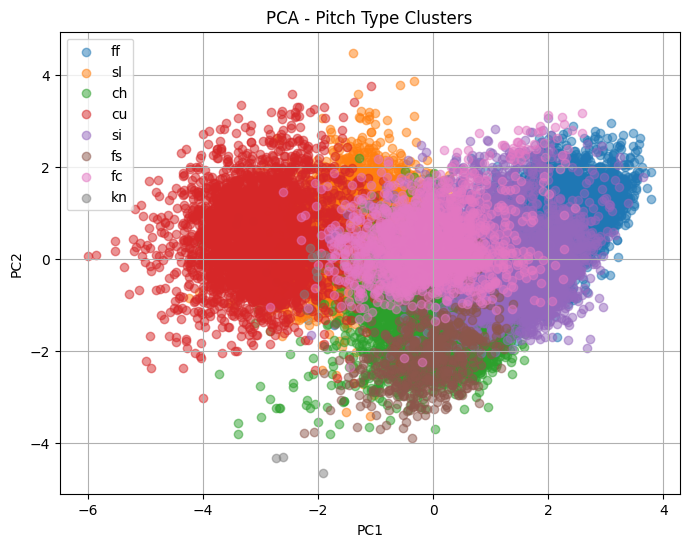

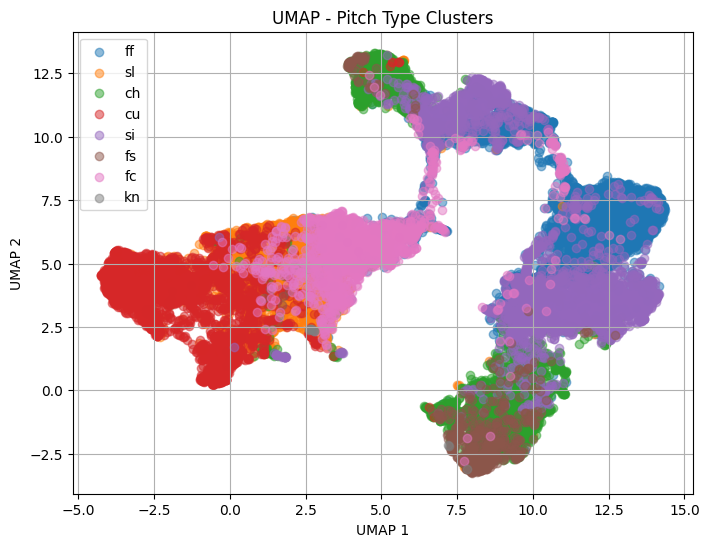

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap.umap_ as umap

# Load your dataset
df = pd.read_csv("pitcher_long_format.csv")

# Select numeric features for dimensionality reduction
features = ['avg_speed', 'avg_spin', 'avg_break_x', 'avg_break_z',
            'avg_break_z_induced', 'avg_break', 'range_speed', 'usage_pct']
df_filtered = df.dropna(subset=features)

# Standardize the features
X = df_filtered[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df_filtered['pca_1'] = pca_result[:, 0]
df_filtered['pca_2'] = pca_result[:, 1]

# UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_result = reducer.fit_transform(X_scaled)
df_filtered['umap_1'] = umap_result[:, 0]
df_filtered['umap_2'] = umap_result[:, 1]

# PCA Plot
plt.figure(figsize=(8,6))
for pitch in df_filtered['pitch_type'].unique():
    subset = df_filtered[df_filtered['pitch_type'] == pitch]
    plt.scatter(subset['pca_1'], subset['pca_2'], label=pitch, alpha=0.5)
plt.title('PCA - Pitch Type Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

# UMAP Plot
plt.figure(figsize=(8,6))
for pitch in df_filtered['pitch_type'].unique():
    subset = df_filtered[df_filtered['pitch_type'] == pitch]
    plt.scatter(subset['umap_1'], subset['umap_2'], label=pitch, alpha=0.5)
plt.title('UMAP - Pitch Type Clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Pitch Similarity Engine using K-Nearest Neighbors

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load the long-format pitcher data with pitch features and metadata
df = pd.read_csv("pitcher_long_format.csv")

# Features to use for similarity comparison
feature_cols = [
    "avg_speed", "avg_spin", "avg_break_x", "avg_break_z",
    "avg_break_z_induced", "avg_break", "range_speed", "usage_pct"
]

# Filter out rows with missing data in the feature columns
df_filtered = df.dropna(subset=feature_cols + ["pitch_type", "name"])

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df_filtered[feature_cols])

# Fit KNN model
knn = NearestNeighbors(n_neighbors=6, metric='euclidean')  # 6 because the first will be self
knn.fit(X)

# Search function
def find_similar_pitches_knn(pitcher_name, pitch_type):
    query_df = df_filtered[(df_filtered["name"] == pitcher_name) & (df_filtered["pitch_type"] == pitch_type)]
    if query_df.empty:
        print("Pitcher or pitch type not found.")
        return []

    query_features = scaler.transform(query_df[feature_cols])
    distances, indices = knn.kneighbors(query_features)

    results = []
    for idx, dist in zip(indices[0][1:], distances[0][1:]):  # Skip self at index 0
        comp = df_filtered.iloc[idx]
        results.append({
            "name": comp["name"],
            "pitch_type": comp["pitch_type"],
            "year": comp["year"],
            "distance": round(dist, 3)
        })
    return results

# Example usage
similar = find_similar_pitches_knn("McCullers Jr., Lance", "ff")
for s in similar:
    print(s)

{'name': 'Strickland, Hunter', 'pitch_type': 'ff', 'year': np.int64(2018), 'distance': np.float64(0.345)}
{'name': 'Wendelken, J.B.', 'pitch_type': 'ff', 'year': np.int64(2021), 'distance': np.float64(0.378)}
{'name': 'Strickland, Hunter', 'pitch_type': 'ff', 'year': np.int64(2022), 'distance': np.float64(0.437)}
{'name': 'Davis, Wade', 'pitch_type': 'ff', 'year': np.int64(2018), 'distance': np.float64(0.474)}
{'name': 'Kahnle, Tommy', 'pitch_type': 'ff', 'year': np.int64(2015), 'distance': np.float64(0.494)}


In [ ]:
find_similar_pitches_knn("deGrom, Jacob", "ff")

[{'name': 'Motte, Jason',
  'pitch_type': 'ff',
  'year': np.int64(2016),
  'distance': np.float64(0.268)},
 {'name': 'Brown, Hunter',
  'pitch_type': 'ff',
  'year': np.int64(2023),
  'distance': np.float64(0.407)},
 {'name': 'Varland, Louis',
  'pitch_type': 'ff',
  'year': np.int64(2024),
  'distance': np.float64(0.41)},
 {'name': 'Curtiss, John',
  'pitch_type': 'ff',
  'year': np.int64(2021),
  'distance': np.float64(0.41)},
 {'name': 'Varland, Louis',
  'pitch_type': 'ff',
  'year': np.int64(2023),
  'distance': np.float64(0.435)}]